In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
    
Names = []
Ratings = []
Reviews = []

In [2]:
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"""

for i in range (1,25):
    np = url+"&page="+str(i)
    r = requests.get(np)
    soup = BeautifulSoup(r.text, "html.parser")
    
    Name = soup.find_all("p" , {"class" : "_2NsDsF AwS1CA"})
    for i in Name:
        Names.append(i.text)

    Rating = soup.find_all("div", {"class" : "XQDdHH Ga3i8K"})
    for i in Rating:
        Ratings.append(i.text)

    Review = soup.find_all("div", {"class" : "ZmyHeo"})
    for i in Review:
        Reviews.append(i.text)    

In [10]:
df = pd.DataFrame({"Name":Names, "Rating":Ratings, "Review":Reviews})
df

,Name,Rating,Review
0,Thakur Surya Pratap Singh,5,Awesome 😎READ MORE
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ..."
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Ajin V,5,High quality camera😍READ MORE
...,...,...,...
215,Dipin Kapoor,4,I am an iphone user since long. I have bought ...
216,Kajal Yadav,5,"I have moved from android to ios, iphone 15 is..."
217,vikash kumar,5,Camera is best qualityREAD MORE
218,Jishnu Samanta,5,I recently purchased the iPhone 15 from Flipka...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    220 non-null    object
 1   Rating  220 non-null    int64 
 2   Review  220 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.3+ KB


In [5]:
df["Rating"] = df["Rating"].astype(int)

In [7]:
df["Name"] = df["Name"].str.title()
df

,Name,Rating,Review
0,Thakur Surya Pratap Singh,5,Awesome 😎READ MORE
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ..."
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Ajin V,5,High quality camera😍READ MORE
...,...,...,...
215,Dipin Kapoor,4,I am an iphone user since long. I have bought ...
216,Kajal Yadav,5,"I have moved from android to ios, iphone 15 is..."
217,Vikash Kumar,5,Camera is best qualityREAD MORE
218,Jishnu Samanta,5,I recently purchased the iPhone 15 from Flipka...


In [11]:
df["Review"] = df["Review"].str.replace("READ MORE" , "")
df

,Name,Rating,Review
0,Thakur Surya Pratap Singh,5,Awesome 😎
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️"
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Ajin V,5,High quality camera😍
...,...,...,...
215,Dipin Kapoor,4,I am an iphone user since long. I have bought ...
216,Kajal Yadav,5,"I have moved from android to ios, iphone 15 is..."
217,vikash kumar,5,Camera is best quality
218,Jishnu Samanta,5,I recently purchased the iPhone 15 from Flipka...


In [13]:
def pol(Value):
    a = TextBlob(Value)
    return a.polarity
    
df["polarity"] = df["Review"].apply(pol)
df

,Name,Rating,Review,polarity
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000
4,Ajin V,5,High quality camera😍,0.160000
...,...,...,...,...
215,Dipin Kapoor,4,I am an iphone user since long. I have bought ...,0.143939
216,Kajal Yadav,5,"I have moved from android to ios, iphone 15 is...",0.225000
217,vikash kumar,5,Camera is best quality,1.000000
218,Jishnu Samanta,5,I recently purchased the iPhone 15 from Flipka...,0.344907


In [17]:
def sub(value):
    a = TextBlob(value)
    return a.subjectivity

df["subjectivity"] = df["Review"].apply(sub)
df

,Name,Rating,Review,polarity,subjectivity
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000,1.000000
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667,0.633333
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000,1.000000
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000,1.000000
4,Ajin V,5,High quality camera😍,0.160000,0.540000
...,...,...,...,...,...
215,Dipin Kapoor,4,I am an iphone user since long. I have bought ...,0.143939,0.312121
216,Kajal Yadav,5,"I have moved from android to ios, iphone 15 is...",0.225000,0.331250
217,vikash kumar,5,Camera is best quality,1.000000,0.300000
218,Jishnu Samanta,5,I recently purchased the iPhone 15 from Flipka...,0.344907,0.635185


In [20]:
def Ave_pol(pol):

avg_pol = df["polarity"].mean()

if avg_pol <= -0.3:
    print ("Negative")
elif avg_pol >= 0.3 :
    print ("Positive")
else :
    print ("Neutral")


print ("The average polarity is", avg_pol)

Positive
The average polarity is 0.49587077264101237


In [29]:
def Sentiment(pol):
    if pol >= 0.75:
        return  "Extremely Positive"
    elif pol > 0:
        return "Positive"
    elif pol == 0:
        return "Neutral"
    elif pol <= 0.75:
        return "Negative"
    else : 
        return "Extremely Negative"
        
df["Sentiment"] = df["polarity"].apply(Sentiment)
df
        
        

,Name,Rating,Review,polarity,subjectivity,Sentiment
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000,1.000000,Extremely Positive
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667,0.633333,Positive
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000,1.000000,Positive
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000,1.000000,Extremely Positive
4,Ajin V,5,High quality camera😍,0.160000,0.540000,Positive
...,...,...,...,...,...,...
215,Dipin Kapoor,4,I am an iphone user since long. I have bought ...,0.143939,0.312121,Positive
216,Kajal Yadav,5,"I have moved from android to ios, iphone 15 is...",0.225000,0.331250,Positive
217,vikash kumar,5,Camera is best quality,1.000000,0.300000,Extremely Positive
218,Jishnu Samanta,5,I recently purchased the iPhone 15 from Flipka...,0.344907,0.635185,Positive


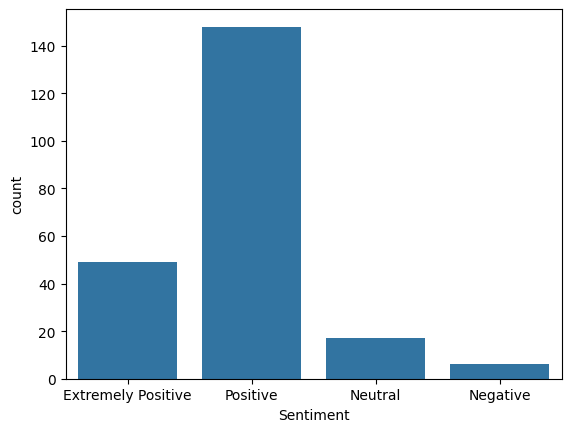

In [31]:
sns.countplot(x = df["Sentiment"])
plt.show()

💡 Recommendations
Based on my sentiment analysis of 300 customer reviews for the iPhone 15 (128GB, Blue) on Flipkart, I propose the following actionable recommendations:

Leverage Positive Sentiment in Marketing
The overall average polarity score is high, indicating strong customer satisfaction. Most reviews are highly positive about the camera quality, smooth performance, and display. These strengths should be highlighted in promotional campaigns.

Feature Real Customer Quotes
Several first-sentence highlights from reviews are short, positive, and persuasive. Including these customer phrases in product banners or social media ads can enhance credibility and drive conversions.

Improve Delivery and Packaging Communication
The few negative reviews mention issues around delivery experience and packaging. Flipkart can consider enhancing buyer communication post-purchase, including proactive updates and quality checks.

Encourage Reviews with Sentiment Anchoring
Since the majority of reviews were subjective, Flipkart could nudge users to mention specific features (camera, battery, design) in reviews. This could improve the quality of insights and help future buyers.

Overall, customer sentiment is strongly positive. The product is well-received, and minor improvements in logistics or service communication can push the sentiment even higher.